In [1]:
from i10_bluesky.devices.rasor.detectorSlits import *
from i10_bluesky.devices.scalerCard import ScaleCard
from i10_bluesky.devices.pimteAD import *
from ophyd_async.core import DeviceCollector 
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky import RunEngine
from bluesky.plans import count, scan 
from dodal.beamlines.beamline_utils import set_directory_provider
from ophyd_async.core._providers import StaticDirectoryProvider
import asyncio
loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
with DeviceCollector():
    ds = DetectorSlits('ME01D-MO-APTR',name = "detSlits")
    #scaler = ScaleCard("ME01D-EA-SCLR-01", name = "rscaler")

In [3]:
result = loop.create_task(ds.dsd.read())


In [4]:
result.result()

{'detSlits-dsd': {'value': 25.6000703125,
  'timestamp': 1711626639.053668,
  'alarm_severity': 0}}

In [5]:
RE(count([ds.dsd,ds.dsu]),bec)



Transient Scan ID: 1     Time: 2024-03-28 11:50:40
Persistent Unique Scan ID: '8e7ba957-ccb3-4633-b173-f5dc69841675'
New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | detSlits-dsd | detSlits-dsu |
+-----------+------------+--------------+--------------+
|         1 | 11:50:40.9 |       25.600 |       26.091 |
+-----------+------------+--------------+--------------+
generator count ['8e7ba957'] (scan num: 1)





('8e7ba957-ccb3-4633-b173-f5dc69841675',)

In [6]:
df =  StaticDirectoryProvider("/dls/i10/data/2024/cm37251-2/processing/", "i10-")

In [7]:
pimte = HDFStatsPimte(
        "BL10I-EA-PIMTE-01:",
        df,
        "pimte",
    )

In [8]:
loop.create_task(pimte.connect())

<Task pending name='Task-67' coro=<Device.connect() running at /venv/lib/python3.11/site-packages/ophyd_async/core/device.py:61>>

In [9]:
result = loop.create_task(pimte.drv.acquire_time.read())

In [10]:
result.result()

{'pimte-drv-acquire_time': {'value': 0.002,
  'timestamp': 1711535777.067056,
  'alarm_severity': 0}}

In [19]:
something = RE(count([pimte],1,0.2),bec)



Transient Scan ID: 3     Time: 2024-03-28 12:09:33
Persistent Unique Scan ID: 'b31c54fc-7f19-4029-b417-a89dc9fa99f1'
New stream: 'primary'


/venv/lib/python3.11/site-packages/bluesky/callbacks/core.py:332: UserWarning: The key pimte will be skipped because LiveTable does not know how to display the dtype array
  warnings.warn("The key {} will be skipped because LiveTable "


+-----------+------------+
|   seq_num |       time |
+-----------+------------+
|         1 | 12:09:36.1 |
+-----------+------------+
generator count ['b31c54fc'] (scan num: 3)





In [20]:
import h5py
import matplotlib.pyplot as plt

In [22]:
with h5py.File("/scratch/i10-bluesky/i10-pimte-hdf.h5","r") as f:
    data = f["entry/data/data"][0]

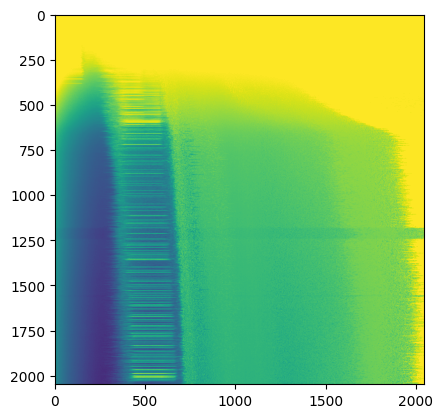

In [24]:
plt.imshow(data)

In [25]:
pimte._controller.